In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras 

2023-10-01 22:07:25.151387: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-01 22:07:25.258130: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-01 22:07:25.258698: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-01 22:07:26.142946: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import pathlib
data_dir='Dataset/PlantVillage_potato/'
test_dir='Dataset/potato_test/'
data_dir=pathlib.Path(data_dir)
test_dir=pathlib.Path(test_dir)
data_dir

PosixPath('Dataset/PlantVillage_potato')

In [3]:
os.listdir(data_dir)

['Potato___Late_blight', 'Potato___Early_blight', 'Potato___healthy']

In [4]:
image_count=len(list(data_dir.glob('*/*.JPG')))
image_count

2152

In [5]:
early_blight=list(data_dir.glob('Potato___Early_blight/*'))
early_blight[:5]

[PosixPath('Dataset/PlantVillage_potato/Potato___Early_blight/fd59ab68-681f-4aca-ae95-6f73bf8caad7___RS_Early.B 7118.JPG'),
 PosixPath('Dataset/PlantVillage_potato/Potato___Early_blight/be89d35f-e382-4b1c-95e8-af88d969d306___RS_Early.B 6758.JPG'),
 PosixPath('Dataset/PlantVillage_potato/Potato___Early_blight/c17c36ed-c36f-42d4-812d-3b17158063d3___RS_Early.B 8398.JPG'),
 PosixPath('Dataset/PlantVillage_potato/Potato___Early_blight/26f15c9c-5cbf-49c8-ac4e-c5b15d03e319___RS_Early.B 9022.JPG'),
 PosixPath('Dataset/PlantVillage_potato/Potato___Early_blight/10a3920b-dd04-406d-8bbd-f92f221e4dee___RS_Early.B 7035.JPG')]

In [6]:
k=PIL.Image.open(str(early_blight[2]))

In [7]:
potato_disease_dict={
    'early_blight':list(data_dir.glob('Potato___Early_blight/*')),
    'late_blight':list(data_dir.glob('Potato___Late_blight/*')),
    'healthy':list(data_dir.glob('Potato___healthy/*'))
}

In [8]:
potato_disease_test_dict={
    'early_blight':list(test_dir.glob('potato_early/*')),
    'late_blight':list(test_dir.glob('potato_late/*')),
    'healthy':list(test_dir.glob('potato_healthy/*'))
}

In [9]:
potato_disease_test_dict

{'early_blight': [PosixPath('Dataset/potato_test/potato_early/potato_early_1120_gblr_3.JPG'),
  PosixPath('Dataset/potato_test/potato_early/potato_early_736.JPG'),
  PosixPath('Dataset/potato_test/potato_early/potato_early_683.JPG'),
  PosixPath('Dataset/potato_test/potato_early/potato_early_235.JPG'),
  PosixPath('Dataset/potato_test/potato_early/potato_early_1050_gblr_4.JPG'),
  PosixPath('Dataset/potato_test/potato_early/potato_early_1120_ccrp_4.JPG'),
  PosixPath('Dataset/potato_test/potato_early/potato_early_1020_ccrp_2.JPG'),
  PosixPath('Dataset/potato_test/potato_early/potato_early_329.JPG'),
  PosixPath('Dataset/potato_test/potato_early/potato_early_1121_ccrp_4.JPG'),
  PosixPath('Dataset/potato_test/potato_early/potato_early_1151_ccrp_4.JPG'),
  PosixPath('Dataset/potato_test/potato_early/potato_early_1118_gblr_3.JPG'),
  PosixPath('Dataset/potato_test/potato_early/potato_early_1148_ccrp_4.JPG'),
  PosixPath('Dataset/potato_test/potato_early/potato_early_1020_ccrp_4.JPG'),
  

In [10]:
potato_lablels_dict={
    'early_blight':0,
    'late_blight':1,
    'healthy':2,
    
}

In [11]:
potato_lablels_dict

{'early_blight': 0, 'late_blight': 1, 'healthy': 2}

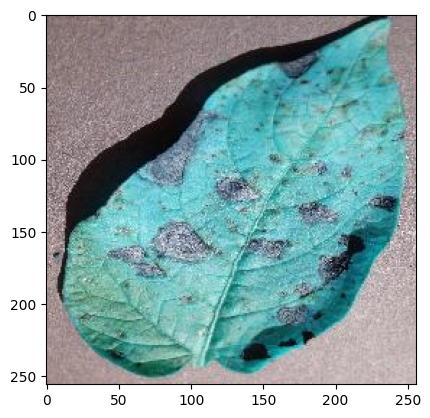

In [12]:
import random
img1=str(potato_disease_dict['early_blight'][random.randint(0,1000)])
img1=cv2.imread(img1)
plt.imshow(img1)

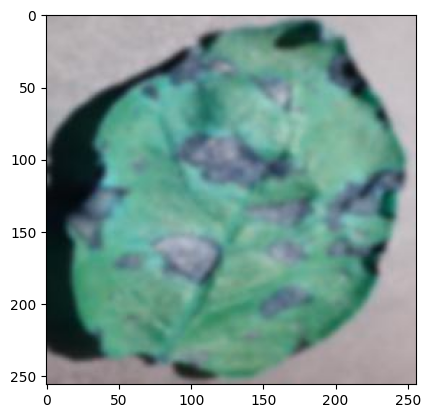

In [13]:
img2=str(potato_disease_test_dict['early_blight'][random.randint(0,1000)])
img2=cv2.imread(img2)
plt.imshow(img2)

In [14]:
X,y=[],[]
X_test,y_test=[],[]
for disease_name, images in potato_disease_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(potato_lablels_dict[disease_name])

for disease_name, images in potato_disease_test_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X_test.append(resized_img)
        y_test.append(potato_lablels_dict[disease_name])

In [15]:
img_height,img_width=X[0].shape[:2]

In [16]:
X[0].shape

(180, 180, 3)

In [17]:
X=np.array(X)
y=np.array(y)

X_test=np.array(X_test)
y_test=np.array(y_test)


from sklearn.utils import shuffle
X_test, y_test = shuffle(X_test, y_test, random_state=42)


In [18]:
y_test[:10]

array([1, 2, 1, 0, 2, 1, 2, 2, 0, 1])

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=42,shuffle=True)

In [20]:
print(len(X_train))
print(len(X_valid))
print(len(y_train))
print(len(y_valid))

1721
431
1721
431


In [21]:
X_train_scaled=X_train/255
X_valid_scaled=X_valid/255
X_test_scaled=X_test/255

In [22]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
num_classes=5
augmented_model=Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=X[0].shape),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomContrast(0.5),
    layers.experimental.preprocessing.RandomFlip(),    
])


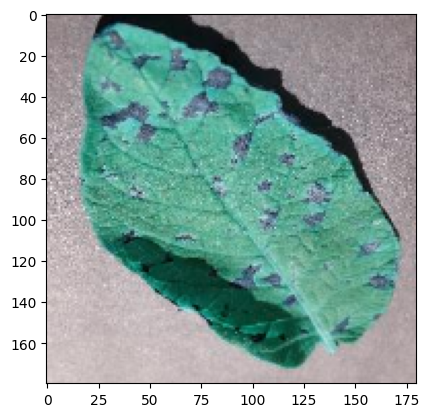

In [23]:
import matplotlib.pyplot as plt
plt.imshow(X[0])

In [24]:
#plt.imshow(augmented_model(X)[0].numpy().astype("uint8"))

In [25]:
num_classes=5
model=Sequential([
    augmented_model,
    layers.Conv2D(64,3, padding='same', input_shape=X[0].shape, activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])

In [26]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [27]:
from keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5,restore_best_weights=True,start_from_epoch=5)

In [ ]:
history=model.fit(X_train_scaled,y_train,
          validation_data=(X_valid_scaled,y_valid),
          batch_size=64,
          epochs=50,
          callbacks=[es]
         )

Epoch 1/50
27/27 [==============================] - 73s 3s/step - loss: 1.1707 - accuracy: 0.4515 - val_loss: 0.9250 - val_accuracy: 0.4548
Epoch 2/50
27/27 [==============================] - 78s 3s/step - loss: 0.7720 - accuracy: 0.6357 - val_loss: 0.6701 - val_accuracy: 0.7285
Epoch 3/50
27/27 [==============================] - 73s 3s/step - loss: 0.4768 - accuracy: 0.8338 - val_loss: 0.5004 - val_accuracy: 0.8445
Epoch 4/50
27/27 [==============================] - 73s 3s/step - loss: 0.3082 - accuracy: 0.8861 - val_loss: 0.3185 - val_accuracy: 0.8654
Epoch 5/50
27/27 [==============================] - 75s 3s/step - loss: 0.2601 - accuracy: 0.8977 - val_loss: 0.4306 - val_accuracy: 0.8028
Epoch 6/50
27/27 [==============================] - 78s 3s/step - loss: 0.3541 - accuracy: 0.8483 - val_loss: 0.2441 - val_accuracy: 0.9072
Epoch 7/50
27/27 [==============================] - 77s 3s/step - loss: 0.2624 - accuracy: 0.8925 - val_loss: 0.2415 - val_accuracy: 0.9095
Epoch 8/50
27/27 [==

In [ ]:
model.save('models/potato_leaf_disease_classification_model3.keras')
model.save('models/potato_leaf_disease_classification_model3.h5')

In [ ]:
plt.plot(history.epoch,history.history["accuracy"])
plt.plot(history.epoch,history.history["val_accuracy"])
plt.show()

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

In [ ]:
model=keras.models.load_model('models/potato_leaf_disease_classification_model.keras')

In [ ]:
model.evaluate(X_valid_scaled,y_valid)

In [ ]:
#test_evaluation=model.evaluate(X_test_scaled,y_test)

In [ ]:
#predictions=[np.argmax(model.predict(np.array([X_test_scaled[i]])))==y_test[i] for i in range(len(X_test_scaled))]

In [ ]:
predictions=model.predict(X_test_scaled)

In [ ]:
predictions2=[np.argmax(predictions[i]) for i in range(len(X_test_scaled))]
predictions3=[np.argmax(predictions[i])==y_test[i] for i in range(len(X_test_scaled))]

In [ ]:
np.argmax(model.predict(np.array([X_test_scaled[4]])))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf=confusion_matrix(predictions2,y_test)

In [ ]:
cf

In [ ]:
import seaborn as sb
sb.heatmap(cf, annot=True,fmt='', cmap='Blues');

In [ ]:
import seaborn as sb
sb.heatmap(cf/np.sum(cf), annot=True,fmt='.2%', cmap='Blues');